# Paso 1: Importar librerias y dataset

### Librerías a usar:

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.utils import resample

### Traer dataset a un DataFrame

In [35]:
pd.options.display.max_rows = 100
df = pd.read_csv("datasetCampus.csv", delimiter=",")

C:\Users\juans\AppData\Local\Temp\ipykernel_18000\3559089795.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasetCampus.csv", delimiter=",")


### Configuraciones de visualización

In [36]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 120

# Paso 2: Limpieza de datos DataFrame

### Reexpresión de tiempos, fechaunix a formato AA/MM/DD HH/MM/SS

In [37]:
df['fechaunix'] = pd.to_datetime(df['fechaunix'], unit='s')

### Reemplazo de datos DataFrame

In [38]:
df['categoria'] = df['categoria'].apply(lambda x: str(x))

### Conteo de valores únicos por columna

In [39]:
for columna in df.columns:
    conteo_valores = df[columna].value_counts().to_dict()
    df_conteo = pd.DataFrame(conteo_valores.items(), columns=[columna, 'conteo'])
    df_conteo.to_csv(f"../Docs/DocsConteo/{columna}_conteo.csv")

# Paso 3: Generar simulación por Bootstrap

### Método Bootstrap

In [40]:
# Función para generar datos sintéticos utilizando bootstrapping
def generar_datos_sinteticos(df, columnas, num_muestras_sinteticas, num_muestras_bootstrap, tamaño_muestra_bootstrap):
    # Cargar los conteos de valores únicos de los archivos CSV
    conteos_columnas = {}
    for columna in columnas:
        conteo_df = pd.read_csv(f"../Docs/DocsConteo/{columna}_conteo.csv")
        conteos_columnas[columna] = dict(zip(conteo_df[columna], conteo_df['conteo']))

    # Crear un DataFrame vacío para almacenar los datos sintéticos
    datos_sinteticos = pd.DataFrame(columns=columnas)

    for _ in range(num_muestras_bootstrap):
        # Tomar una muestra con reemplazo del conjunto de datos original
        muestra_bootstrap = resample(df[columnas], replace=True, n_samples=tamaño_muestra_bootstrap, random_state=42)

        # Generar datos sintéticos a partir de la muestra de bootstrap
        datos_sinteticos_muestra = pd.DataFrame(index=range(num_muestras_sinteticas), columns=columnas)
        for columna in columnas:
            valores_unicos = muestra_bootstrap[columna].unique()
            conteo_valores = conteos_columnas[columna]

            # Calcular las probabilidades de los valores únicos
            conteos_array = np.array([conteo_valores.get(valor, 0) for valor in valores_unicos])
            probabilidades = conteos_array / sum(conteos_array)

            # Generar datos sintéticos para la columna basados en las frecuencias observadas
            datos_sinteticos_muestra[columna] = np.random.choice(valores_unicos, size=num_muestras_sinteticas, p=probabilidades)

        # Agregar los datos sintéticos de la muestra al DataFrame principal
        datos_sinteticos = pd.concat([datos_sinteticos, datos_sinteticos_muestra], ignore_index=True)

    return datos_sinteticos

### Ejemplo de ejecución

In [41]:
# Ejemplo de uso
columnas_interes = ['accion', 'categoria', 'crud', 'curso']
num_muestras_sinteticas = 1000000  # Número de muestras sintéticas a generar
num_muestras_bootstrap = 1  # Número de muestras de bootstrap
tamaño_muestra_bootstrap = len(df)  # Tamaño de cada muestra de bootstrap

datos_sinteticos = generar_datos_sinteticos(df, columnas_interes, num_muestras_sinteticas, num_muestras_bootstrap, tamaño_muestra_bootstrap)
print(datos_sinteticos.head())

    accion categoria crud                               curso
0   viewed         1    r           PENSAMIENTO LOGICO_LENG-B
1  updated         4    u    SISTEMAS DIGITALES II_SIS DIG II
2   viewed         3    r  CONTABILIDAD FINANCIERA BÁSICA_DIA
3  updated         5    r       EPISTEMOLOGIA_ARQA3_AMB_INDB3
4   viewed         3    u           MACHINE LEARNING_CAT OPCI


### Crear CSV con nuevos datos

In [42]:
datos_sinteticos.to_csv("DatosSinteticos.csv")

### Conteo de datos únicos por columna

In [43]:
# Conteo de valores únicos y su frecuencia para cada columna
for var in datos_sinteticos.columns:
    conteo_valores = datos_sinteticos[var].value_counts().to_dict()
    df_conteo = pd.DataFrame(conteo_valores.items(), columns=[var, 'conteo'])
    df_conteo.to_csv(f"../Docs/DocsConteoNuevoSynt/{var}_conteo.csv")

# Paso 4: Análisis

## Gráficas de columna CRUD

### Gráfica simulada

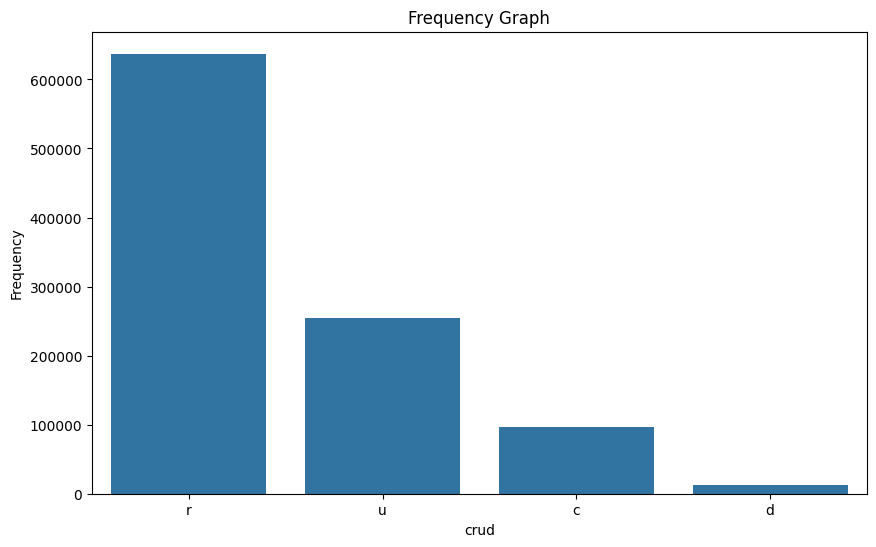

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x="crud", data=datos_sinteticos)

plt.title("Frequency Graph")
plt.xlabel("crud")
plt.ylabel("Frequency")

plt.show()

### Gráfica original

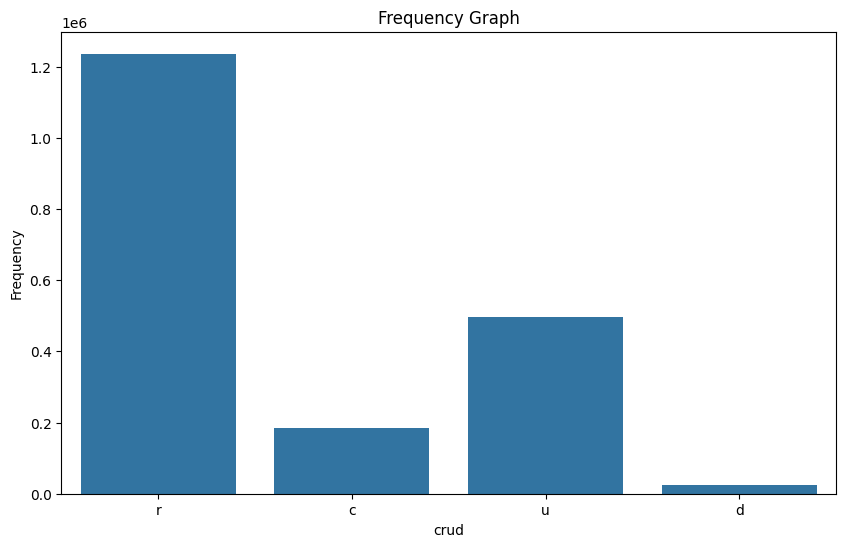

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x="crud", data=df)

plt.title("Frequency Graph")
plt.xlabel("crud")
plt.ylabel("Frequency")

plt.show()

### Gráfica simulada

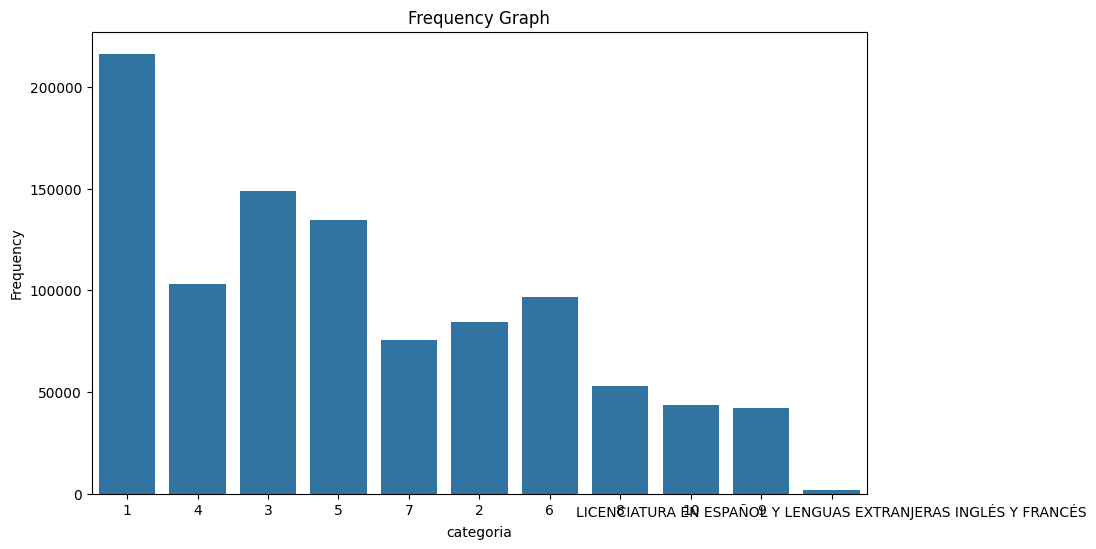

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x="categoria", data=datos_sinteticos)

plt.title("Frequency Graph")
plt.xlabel("categoria")
plt.ylabel("Frequency")

plt.show()

### Gráfica original

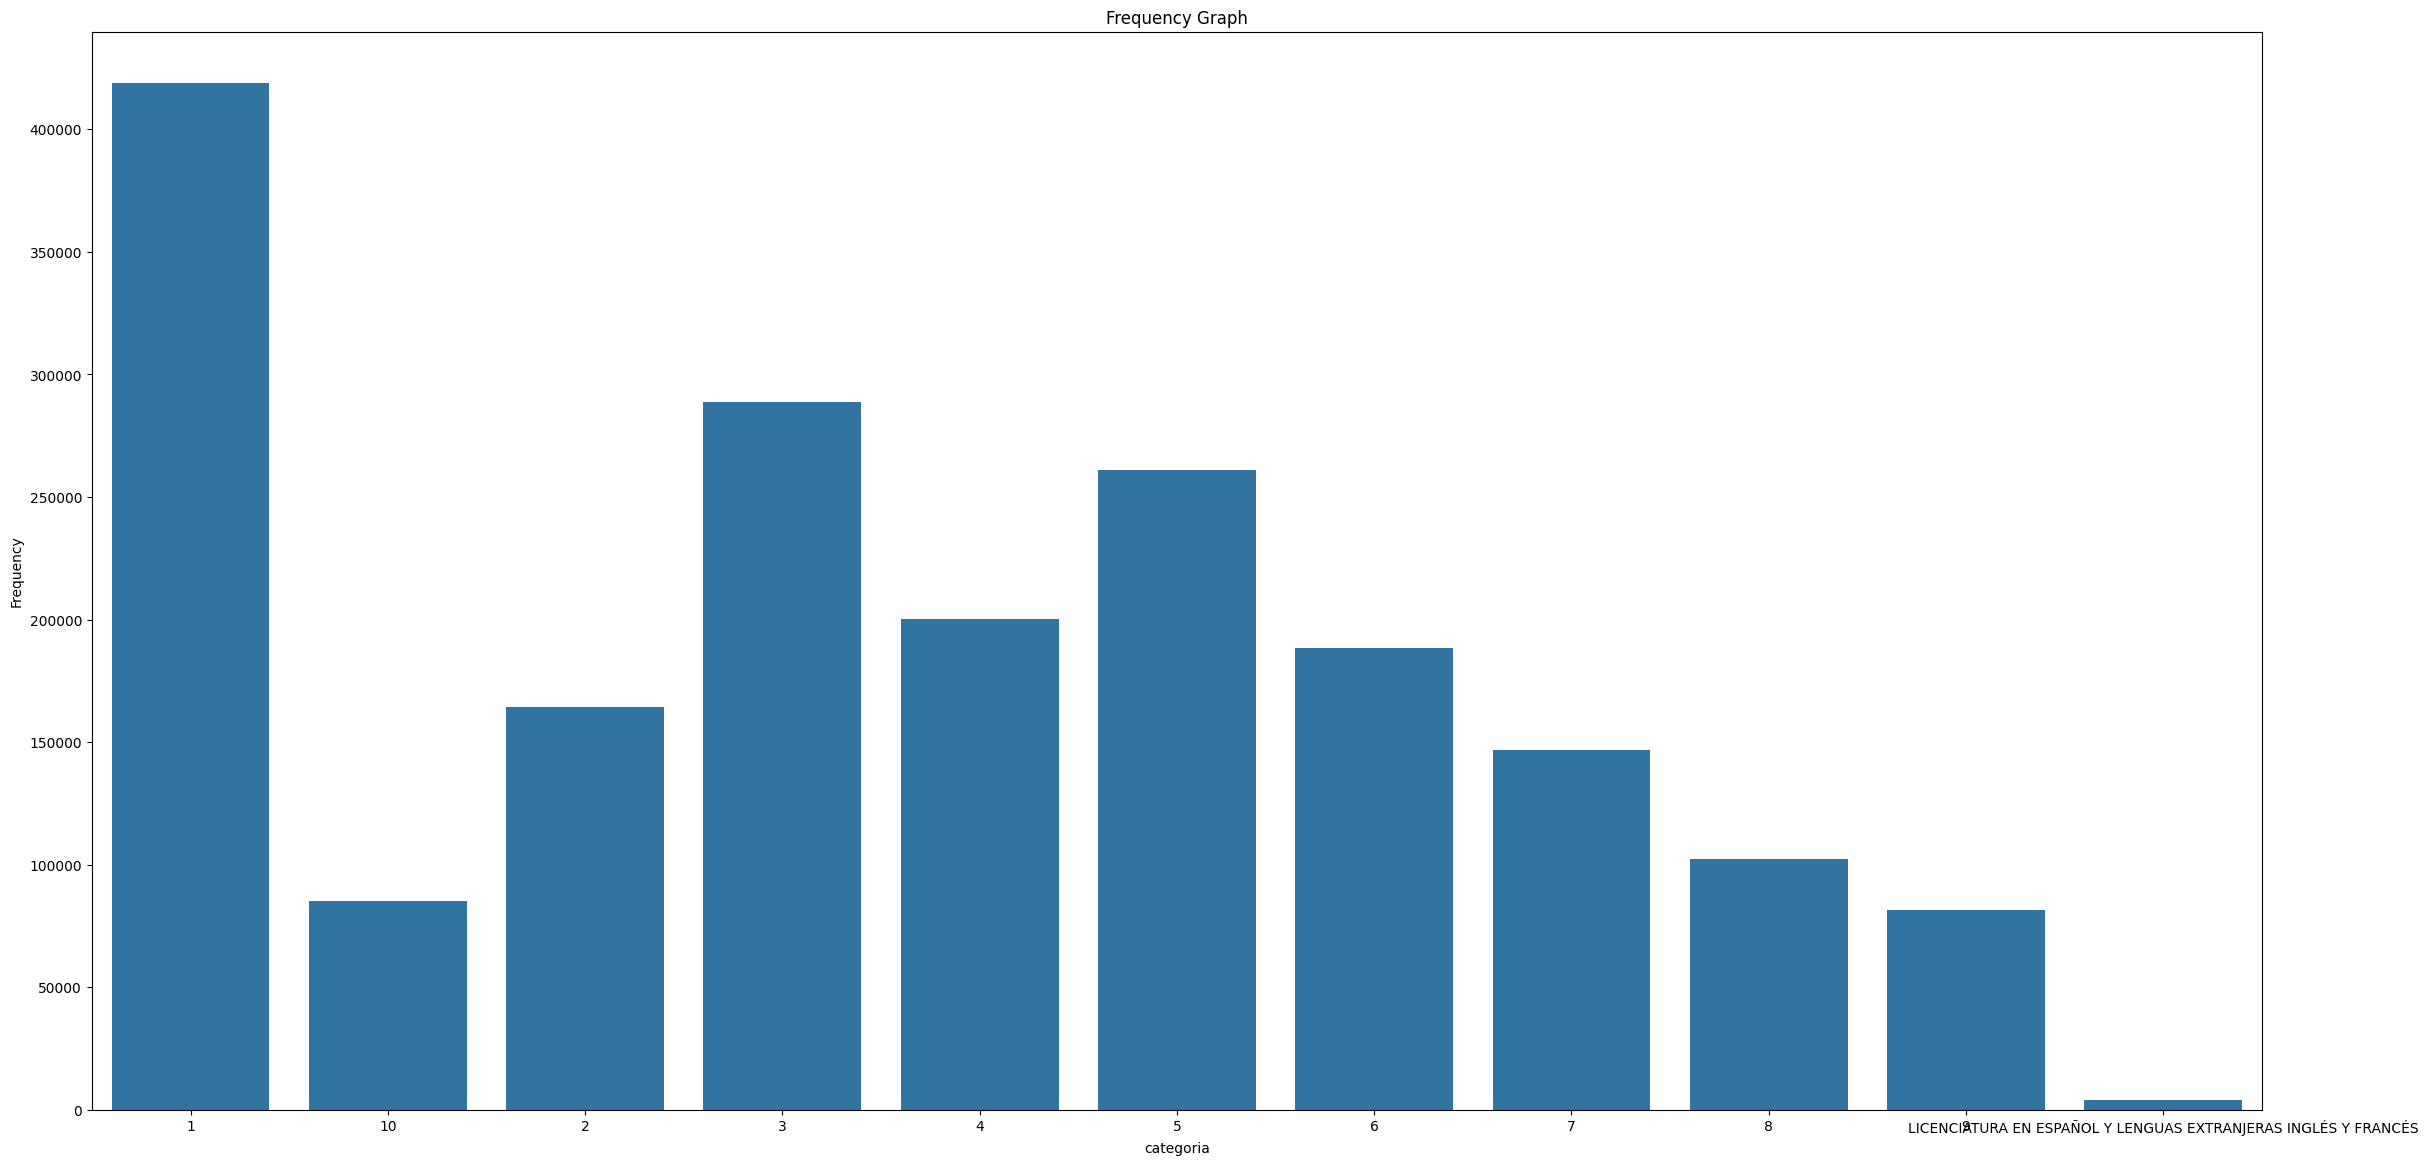

In [47]:
plt.figure(figsize=(28,14))
sns.countplot(x="categoria", data=df)

plt.title("Frequency Graph")
plt.xlabel("categoria")
plt.ylabel("Frequency")

plt.show()